In [1]:
from google.colab import files
uploaded = files.upload()

Saving headbrain.csv to headbrain.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('headbrain.csv')

In [4]:
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [5]:
# Data Preprocessing
# - Feature Scaling
#   - Normalization
#   - Standardization

In [9]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [12]:
X[:10]

array([[4512],
       [3738],
       [4261],
       [3777],
       [4177],
       [3585],
       [3785],
       [3559],
       [3613],
       [3982]])

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [10]:
st = StandardScaler()
X_scaled = st.fit_transform(X)
y_scaled = st.fit_transform(y)

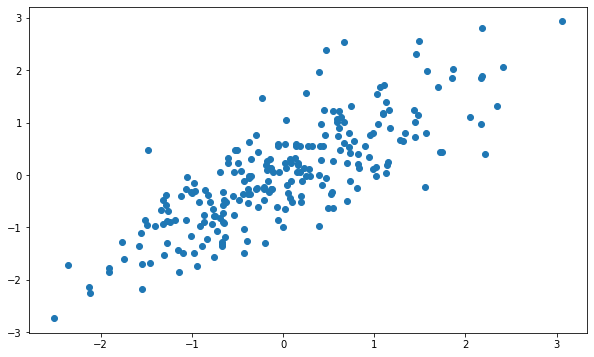

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(X_scaled,y_scaled)
plt.show()

In [18]:
n = len(X)

def cost_function(x, y, slope, inter):
  loss = 0
  for i in range(n):
    loss += ((slope * x[i] + inter) - y[i]) ** 2
  loss = loss / n
  return loss

In [19]:
cost_function(X_scaled, y_scaled, 0, 0)

array([1.])

In [22]:
def gradient_descent(x, y, epochs, alpha):
  slope = 0
  inter = 0
  cost = []
  for i in range(epochs):
    y_pred = slope * x + inter
    loss = y_pred - y
    slope_grad = (2/n) * np.dot(loss.T, x)
    inter_grad = (2/n) * np.sum(loss)
    slope = slope - slope_grad * alpha
    inter = inter - inter_grad * alpha
    cost.append(cost_function(x, y, slope, inter))
  return slope, inter, cost

In [41]:
epochs = 200
alpha = 0.01
slope, inter, cost = gradient_descent(X_scaled, y_scaled, epochs, alpha)

In [42]:
slope, inter

(array([[0.78550692]]), -2.9066294612633613e-16)

In [43]:
cost = np.asarray(cost).flatten()

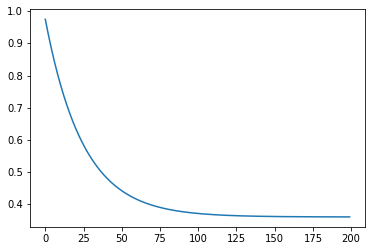

In [44]:
plt.plot(cost)

In [45]:
cost[-1]

0.3608860420874126

In [49]:
predictions = []
for i in range(n):
  y_pred = slope[0] * X_scaled[i] + inter
  predictions.append(y_pred)

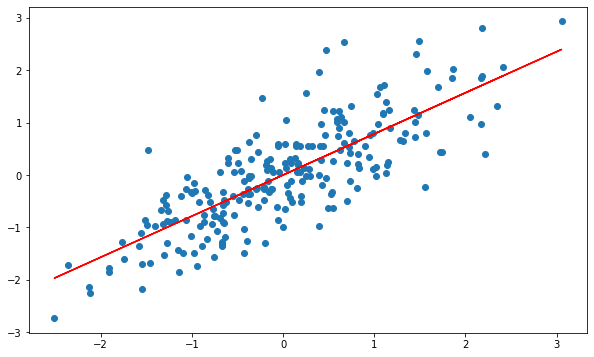

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(X_scaled,y_scaled)
plt.plot(X_scaled, predictions, 'red')
plt.show()